In [15]:


def cutLines(imgIn, plots):
    height, width = imgIn.shape
    rowsForPlot = numpy.zeros(shape=(height,width))
    rowsBlackPixelCount = numpy.zeros(shape=(height,1),dtype=numpy.int16)
    
    for iRow in range(0,height):
        for iCol in range(0, width):
            if (imgIn[iRow,iCol]<=127):
                rowsBlackPixelCount[iRow]=rowsBlackPixelCount[iRow]+1
                if(plots==1):
                    rowsForPlot[iRow,rowsBlackPixelCount[iRow]-1]=254
    
    if(plots==1):
        plt.rcParams["figure.figsize"] = [18.0, 24]
        image = numpy.concatenate((imgIn,rowsForPlot),axis=1)
        plt.imshow(image,cmap='gray' )
        plt.show()

    
    linesLocation = []
    black = 0
    for iRow in range(0,height):
        if(rowsBlackPixelCount[iRow]>(width*0.5)):
            if(black==0):
                linesLocation.append(iRow)
                black=1
        else:
            black=0
    
    lineSpaces = linesLocation[1]-linesLocation[0]
    #lineSpaces = 0
    
    accoladeS = []
    for iAccolade in range(0,len(linesLocation),10):
        accoladeS.append(imgIn[(linesLocation[iAccolade+0]-2*lineSpaces):(linesLocation[iAccolade+4]+2*lineSpaces),0:width])
        accoladeS.append(imgIn[(linesLocation[iAccolade+5]-2*lineSpaces):(linesLocation[iAccolade+9]+2*lineSpaces),0:width])   
    
    return(accoladeS)


In [56]:
def cutSingleNotes(imgIn, plots):
    height, width = imgIn.shape
    columnsForPlot = numpy.zeros(shape=(height,width))
    columnsBlacPixelsCount = numpy.zeros(shape=(width,1),dtype=numpy.int16)
    
    for iCol in range(0,width):
        for iRow in range(0,height):
            if (imgIn[iRow,iCol]<=127):
                columnsBlacPixelsCount[iCol]=columnsBlacPixelsCount[iCol]+1
                if(plots==1):
                    columnsForPlot[columnsBlacPixelsCount[iCol]-1,iCol]=254  
    
    if(plots==1):
        plt.rcParams["figure.figsize"] = [18.0, 24]
        image = numpy.concatenate((imgIn,columnsForPlot),axis=0)
        plt.imshow(image,cmap='gray' )
        plt.show()
        #print(columnsBlacPixelsCount)
    
    notesLocations = []
    begin = 0
    pixelVal = 9#numpy.mean(columnsBlacPixelsCount)
    tmp=[0,0]
    
    for iCol in range(1,width):
        if((columnsBlacPixelsCount[iCol]>pixelVal) and (columnsBlacPixelsCount[iCol-1]<=pixelVal)):
            #tmp[0]=iCol
            notesLocations.append(iCol)
        if((columnsBlacPixelsCount[iCol-1]>pixelVal) and (columnsBlacPixelsCount[iCol]<=pixelVal)):
            #tmp[1]=iCol
            notesLocations.append(iCol)
            
        #if((tmp[0]>0)&&(tmp[1]>0)):
        #    notesLocations.append(tmp);
        #    tmp=[0,0]
    notes=[]
    for iNote in range(0,len(notesLocations),2):
        tmp=imgIn[0:height,(notesLocations[iNote]-10):(notesLocations[iNote]+10)]
        notes.append(tmp)
        if(plots==1):
            plt.rcParams["figure.figsize"] = [2, 3]
            plt.imshow(tmp,cmap='gray' )
            plt.show()
    

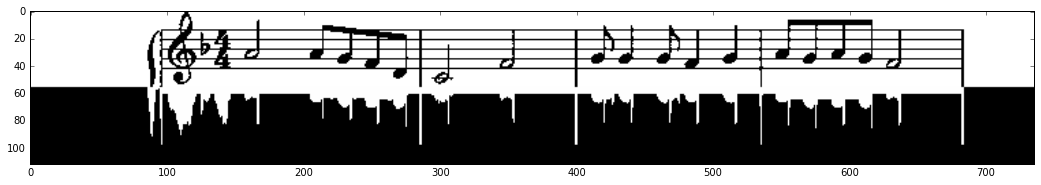

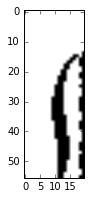

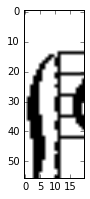

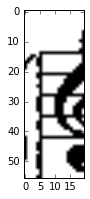

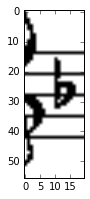

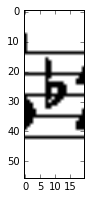

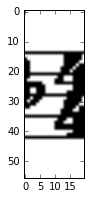

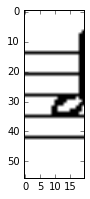

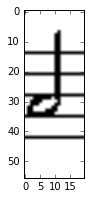

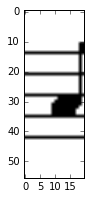

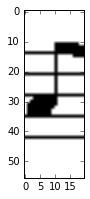

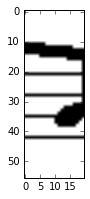

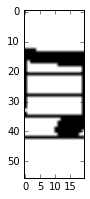

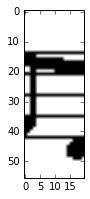

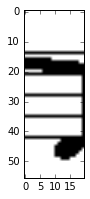

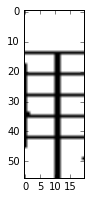

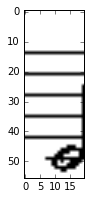

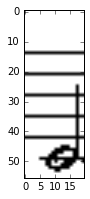

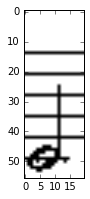

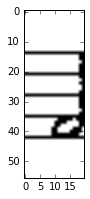

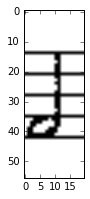

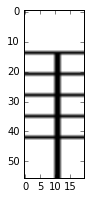

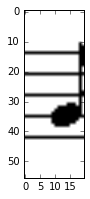

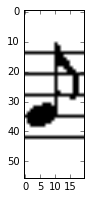

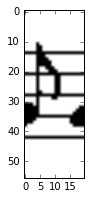

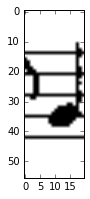

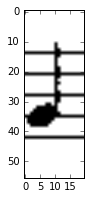

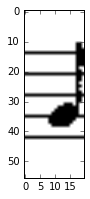

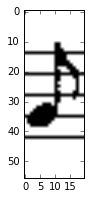

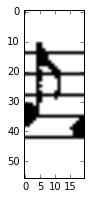

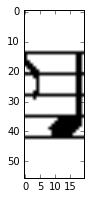

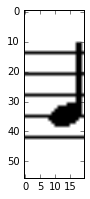

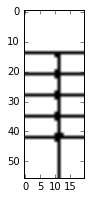

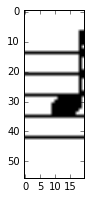

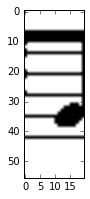

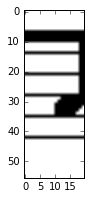

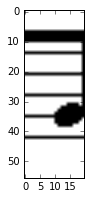

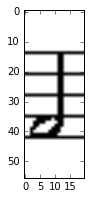

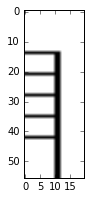

In [57]:
import numpy
import cv2
from matplotlib import pyplot as plt

# Load an color image in grayscale
img_l = cv2.imread('notes001.jpg')
img_t = cv2.cvtColor(img_l, cv2.COLOR_BGR2GRAY)
tmp, img = cv2.threshold(img_t,200,255,cv2.THRESH_BINARY)
singleLines = cutLines(img,0)

cutSingleNotes(singleLines[0],1)


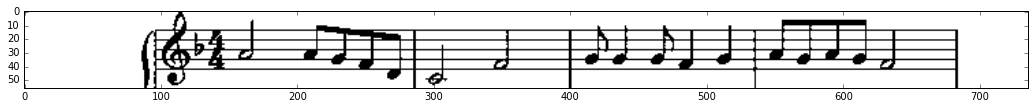

In [53]:
plt.rcParams["figure.figsize"] = [18.0, 12.0]
plt.imshow(out[0],cmap='gray' )
plt.show()



[12.0, 8.0]
